In [1]:
# This example imports functions from the DemoReadSGLXData module to read
# analog data and convert it to volts based on the metadata information.
# The metadata file must be present in the same directory as the binary file.
# Works with both imec and nidq analog channels.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tkinter import Tk
from tkinter import filedialog
from DemoReadSGLXData.readSGLX import readMeta, SampRate, makeMemMapRaw, GainCorrectIM, GainCorrectNI

In [2]:
# Get bin file from user
root = Tk()         # create the Tkinter widget
root.withdraw()     # hide the Tkinter root window

# Windows specific; forces the window to appear in front
root.attributes("-topmost", True)
binFullPath = Path('C:/Users/su-xiongy/Documents/realtime-analysis/data/ceph_5843_1_g0_imec0/ceph_5843_1_g0_t0.imec0.ap.bin')

root.destroy()

In [14]:
binFullPath

WindowsPath('C:/Users/su-xiongy/Documents/realtime-analysis/data/ceph_5843_1_g0_imec0/ceph_5843_1_g0_t0.imec0.ap.bin')

In [3]:
# Other parameters about what data to read
tStart = 0        # in seconds
tEnd = 0.1
chanList = [0]    # list of channels to extract, by index in saved file

In [4]:
meta = readMeta(binFullPath)
sRate = SampRate(meta)

firstSamp = int(sRate*tStart)
lastSamp = int(sRate*tEnd)
rawData = makeMemMapRaw(binFullPath, meta)
selectData = rawData[chanList, firstSamp:lastSamp+1]


if meta['typeThis'] == 'imec':
    # apply gain correction and convert to uV
    convData = 1e6*GainCorrectIM(selectData, chanList, meta)
else:
    # apply gain correction and convert to mV
    convData = 1e3*GainCorrectNI(selectData, chanList, meta)

nChan: 385, nFileSamp: 167146363


In [10]:
rawData.shape

(385, 3877149)

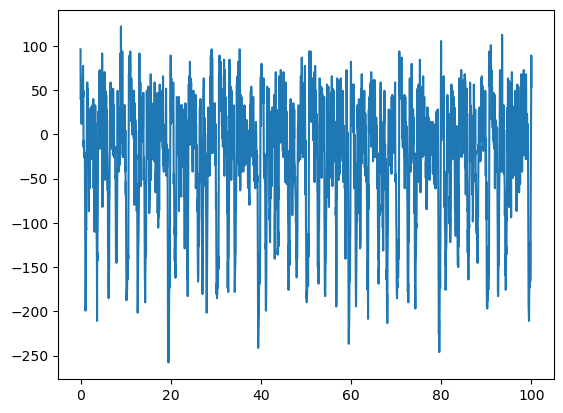

In [8]:
# Plot the first of the extracted channels
tDat = np.arange(firstSamp, lastSamp+1, dtype='uint64')
tDat = 1000*tDat/sRate      # plot time axis in msec
fig, ax = plt.subplots()
ax.plot(tDat, convData[0, :])
plt.show()
